In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
plt.style.use('seaborn-v0_8-whitegrid') # استخدمتها لتحسين عرض الرسومات (رسومات افضل) 

In [13]:
file_path = r"C:\Users\zaharaa\Desktop\country_wise_latest.csv"
data = pd.read_csv(file_path)

print(data.shape)

(187, 15)


### فحص البيانات

In [14]:
data.head(10)
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [18]:
cols_to_numeric = ['Confirmed', 'Deaths', 'Recovered', 'Active', 
                   'New cases', 'New deaths', 'New recovered', 
                   'Deaths / 100 Cases', 'Recovered / 100 Cases', 
                   'Deaths / 100 Recovered', 
                   'Confirmed last week', '1 week change', '1 week % increase']
data[cols_to_numeric] = data[cols_to_numeric].apply(pd.to_numeric, errors='coerce') 
# هنا قمت بتحويل الاعمدة الرقمية الى ارقام (يعني كان نص وصار رقم)

### التحليلات الاساسية 

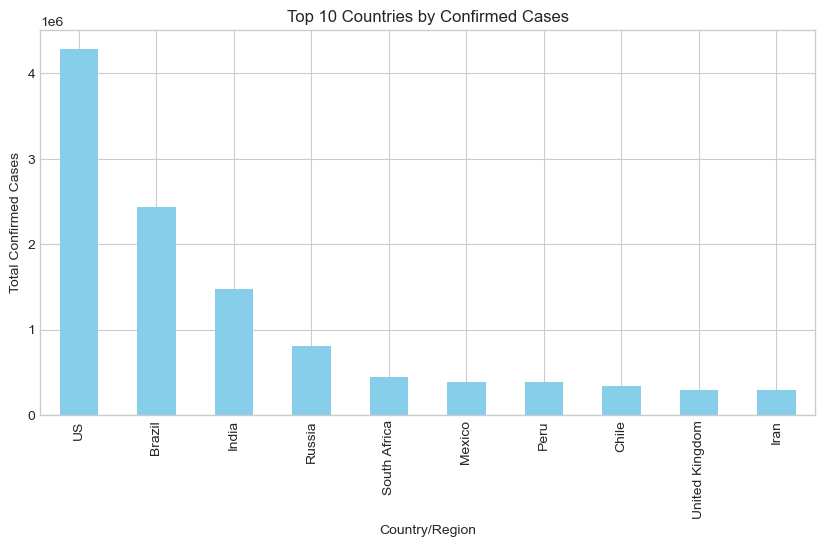

In [21]:
## أكثر 10 دول من حيث الإصابات
top_confirmed = data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)
top_confirmed.plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Confirmed Cases', color='skyblue')
plt.ylabel('Total Confirmed Cases')
plt.show()

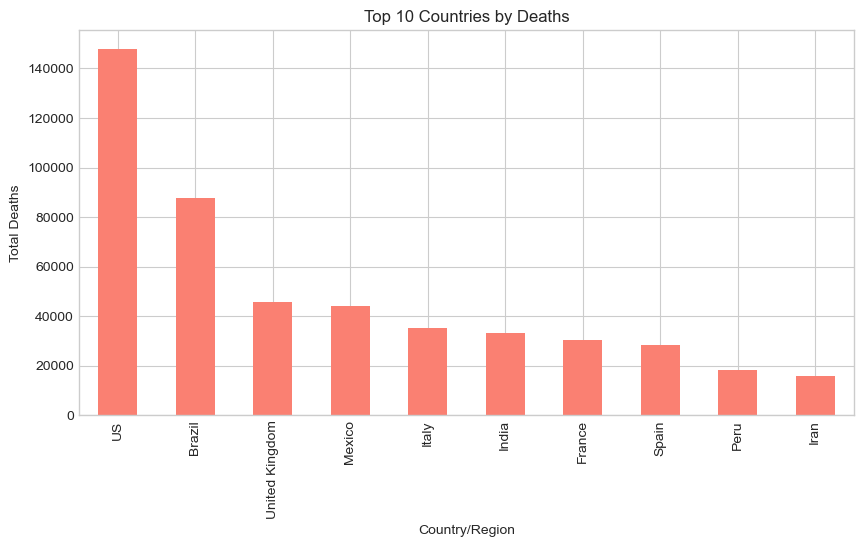

In [22]:
###كثر 10 دول من حيث الوفيات 
top_deaths = data.groupby('Country/Region')['Deaths'].sum().sort_values(ascending=False).head(10)
top_deaths.plot(kind='bar', figsize=(10,5), title='Top 10 Countries by Deaths', color='salmon')
plt.ylabel('Total Deaths')
plt.show()

### التحليل حسب منظمة الصحة لعالمية 

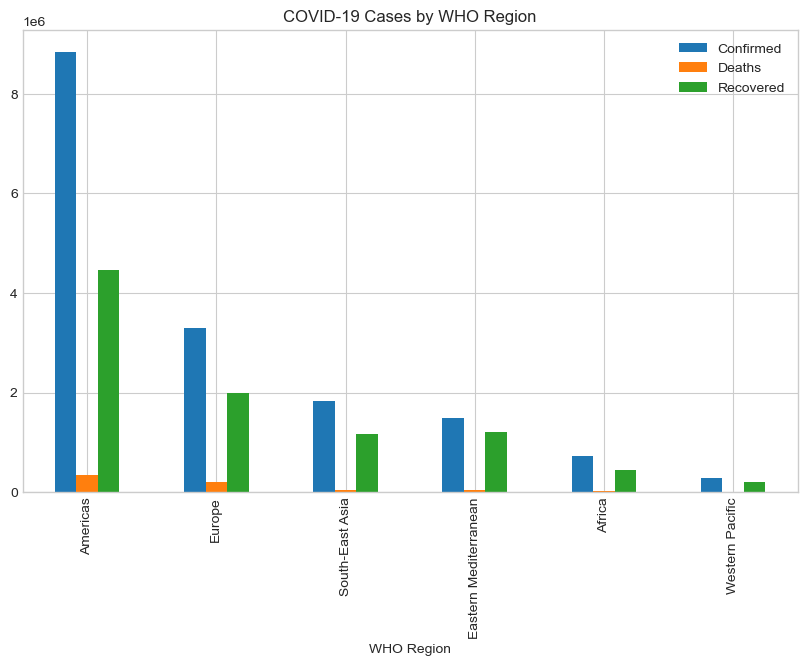

In [23]:
region_stats = data.groupby('WHO Region')[['Confirmed', 'Deaths', 'Recovered']].sum().sort_values(by='Confirmed', ascending=False)
region_stats.plot(kind='bar', figsize=(10,6), title='COVID-19 Cases by WHO Region')
plt.show()

### النسب و المقارنات 

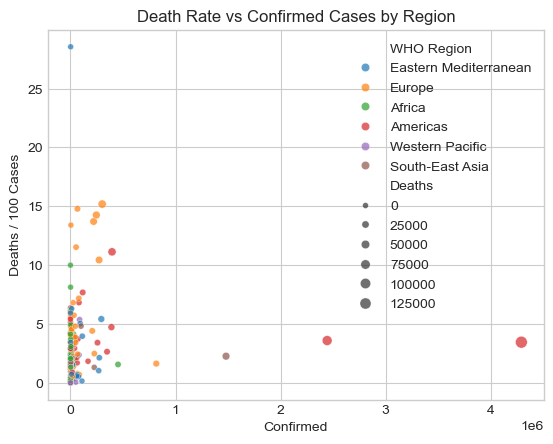

In [24]:
# نسبة الوفيات إلى الإصابات
sns.scatterplot(data=data, x='Confirmed', y='Deaths / 100 Cases', hue='WHO Region', size='Deaths', alpha=0.7)
plt.title('Death Rate vs Confirmed Cases by Region')
plt.show()

### نمو الحالات الأسبوعي

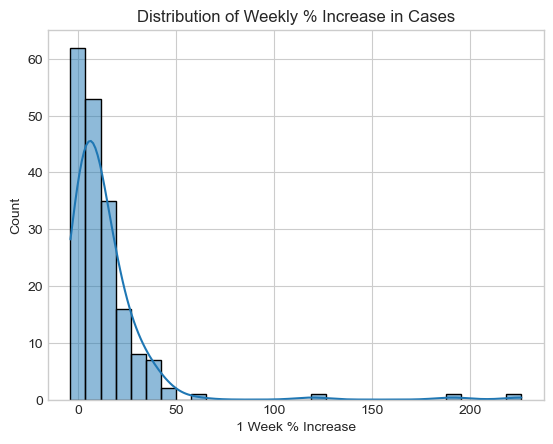

In [25]:
sns.histplot(data['1 week % increase'], bins=30, kde=True)
plt.title('Distribution of Weekly % Increase in Cases')
plt.xlabel('1 Week % Increase')
plt.show()

C:\Users\zaharaa\AppData\Local\Temp\ipykernel_1228\3612108213.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_death_recovery.head(10), x='Deaths / 100 Recovered', y='Country/Region', palette='Reds_r')


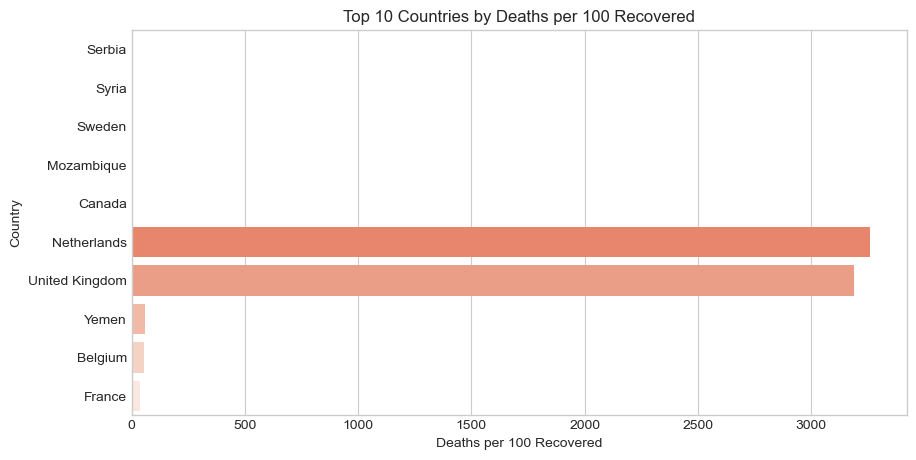

In [27]:
# ترتيب الدول حسب معدل الوفيات لكل 100 متعافٍ
top_death_recovery = data[['Country/Region', 'Deaths / 100 Recovered']].sort_values(by='Deaths / 100 Recovered', ascending=False)

# عرض أعلى 10 دول
top_death_recovery.head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_death_recovery.head(10), x='Deaths / 100 Recovered', y='Country/Region', palette='Reds_r')
plt.title('Top 10 Countries by Deaths per 100 Recovered')
plt.xlabel('Deaths per 100 Recovered')
plt.ylabel('Country')
plt.show()

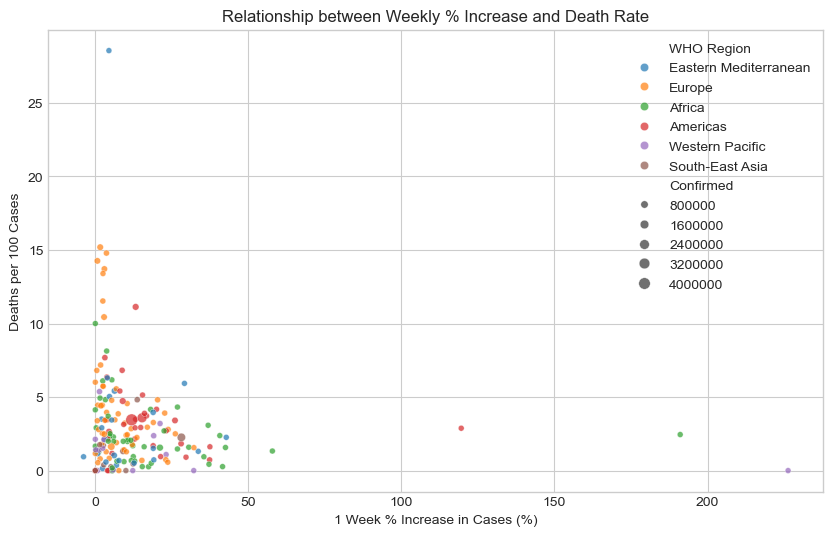

In [28]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=data, 
    x='1 week % increase', 
    y='Deaths / 100 Cases',
    hue='WHO Region',  # تلوين حسب المنطقة
    size='Confirmed',  # حجم النقاط حسب عدد الحالات
    alpha=0.7
)
plt.title('Relationship between Weekly % Increase and Death Rate')
plt.xlabel('1 Week % Increase in Cases (%)')
plt.ylabel('Deaths per 100 Cases')
plt.show()

In [30]:
correlation = data['1 week % increase'].corr(data['Deaths / 100 Cases'])
print("Correlation between weekly increase and death rate:", correlation)

Correlation between weekly increase and death rate: -0.13453419632523667


### بشكل عام، الدول التي تشهد زيادة سريعة في الحالات لا تميل بالضرورة 
### لأن يكون معدل الوفيات أعلى، وربما يكون هناك عوامل أخرى أكثر 

#####  تأثيرًا على معدل الوفيات، مثل: جودة النظام الصحي، متوسط عمر السكان، أو سرعة الاستجابة الطبية

WHO Region
Western Pacific          76.805000
Europe                   68.635000
South-East Asia          66.704000
Eastern Mediterranean    66.593182
Americas                 62.291429
Africa                   57.014792
Name: Recovered / 100 Cases, dtype: float64


C:\Users\zaharaa\AppData\Local\Temp\ipykernel_1228\2723896614.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_recovery.values, y=region_recovery.index, palette='Greens_r')


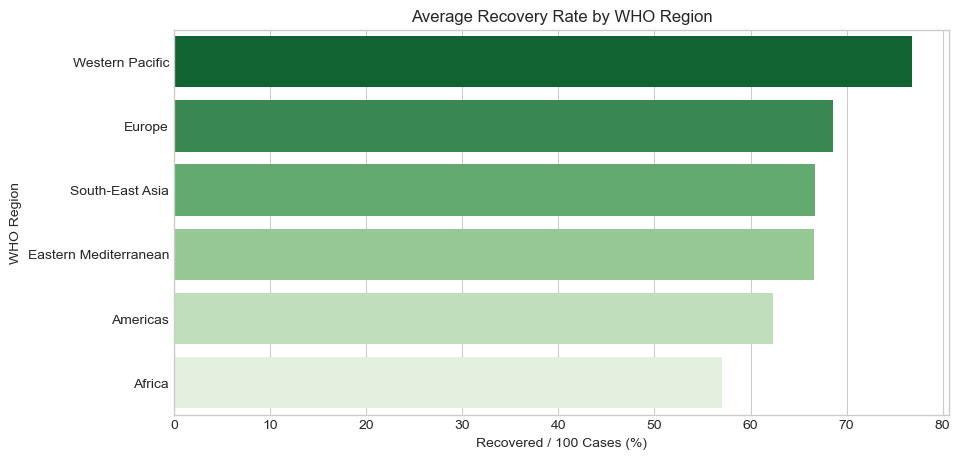

In [31]:
# حساب متوسط نسبة التعافي لكل منطقة
region_recovery = data.groupby('WHO Region')['Recovered / 100 Cases'].mean().sort_values(ascending=False)

# عرض النتائج
print(region_recovery)

# رسم بياني
plt.figure(figsize=(10,5))
sns.barplot(x=region_recovery.values, y=region_recovery.index, palette='Greens_r')
plt.title('Average Recovery Rate by WHO Region')
plt.xlabel('Recovered / 100 Cases (%)')
plt.ylabel('WHO Region')
plt.show()

In [37]:
if 'Date' in data.columns:
    fig = px.line(data, x='Date', y='Confirmed', color='Country/Region', 
                  title='Confirmed Cases Over Time by Country')
    fig.show()

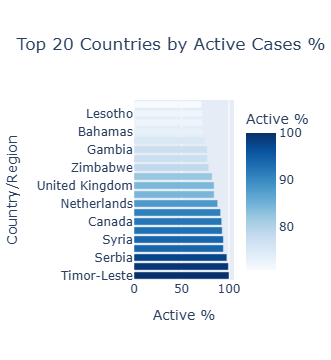

In [40]:

# حساب النسبة المئوية للحالات النشطة
data['Active %'] = data['Active'] / data['Confirmed'] * 100

# إنشاء الرسم البياني بألوان هادئة
fig = px.bar(
    data.sort_values('Active %', ascending=False).head(20),
    x='Active %',
    y='Country/Region',
    orientation='h',
    color='Active %',
    color_continuous_scale='Blues',  # ألوان هادئة
    title='Top 20 Countries by Active Cases %'
)

fig.show()


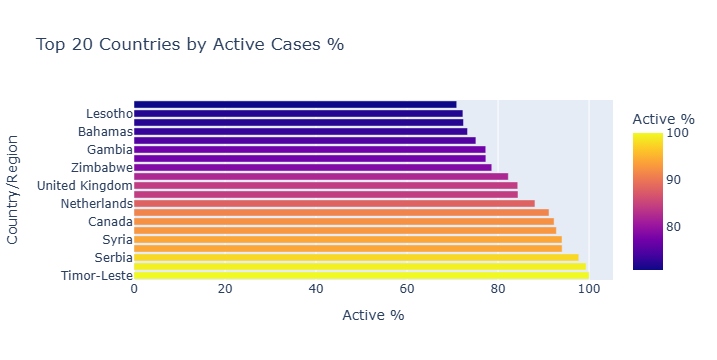

In [41]:
# النسبة المئوية للحالات النشطة لكل دولة
data['Active %'] = data['Active'] / data['Confirmed'] * 100

fig = px.bar(data.sort_values('Active %', ascending=False).head(20), 
             x='Active %', y='Country/Region', orientation='h', 
             color='Active %', title='Top 20 Countries by Active Cases %')
fig.show()

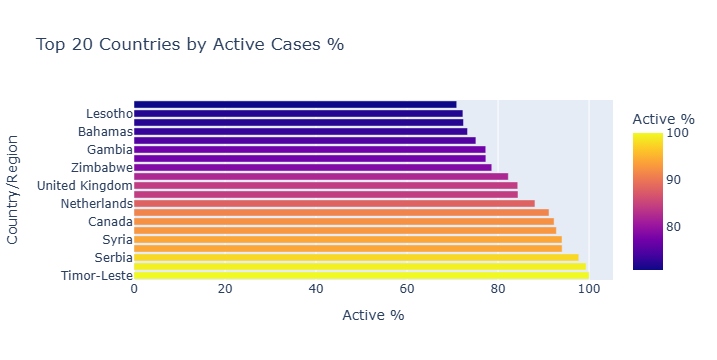

In [42]:
data['Active %'] = data['Active'] / data['Confirmed'] * 100

fig = px.bar(data.sort_values('Active %', ascending=False).head(20), 
             x='Active %', y='Country/Region', orientation='h', 
             color='Active %', title='Top 20 Countries by Active Cases %')
fig.show()

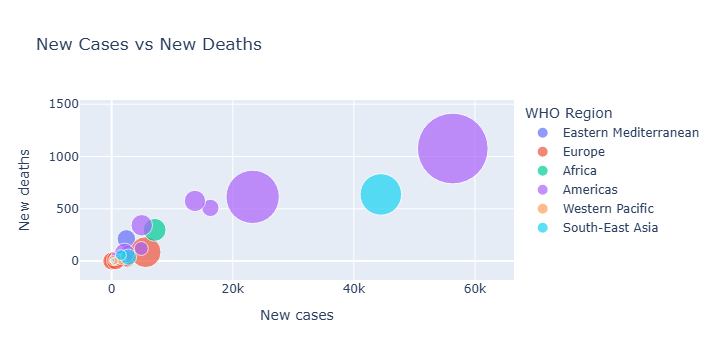

In [43]:
# Scatter تفاعلي بين الحالات الجديدة والوفيات الجديدة
fig = px.scatter(data, x='New cases', y='New deaths', size='Confirmed', color='WHO Region',
                 hover_name='Country/Region', size_max=50,
                 title='New Cases vs New Deaths')
fig.show()

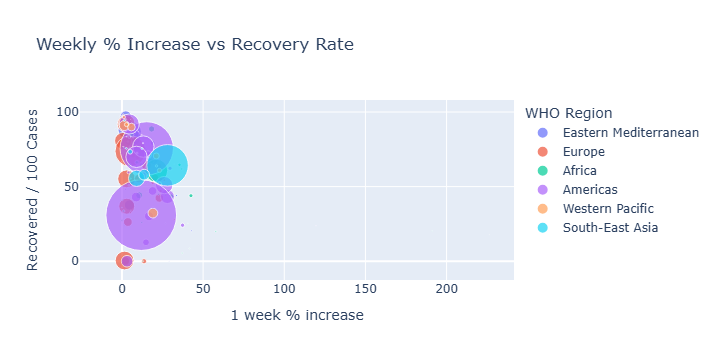

In [44]:
# توزيع نسبة الزيادة الأسبوعية ومعدل التعافي
fig = px.scatter(data, x='1 week % increase', y='Recovered / 100 Cases', 
                 size='Confirmed', color='WHO Region',
                 hover_name='Country/Region', size_max=50,
                 title='Weekly % Increase vs Recovery Rate')
fig.show()

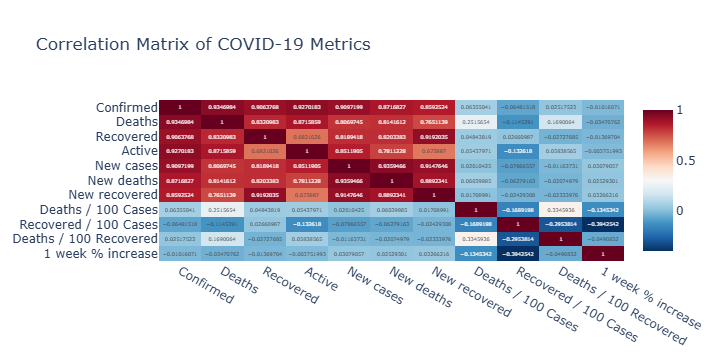

In [45]:

numeric_cols = ['Confirmed', 'Deaths', 'Recovered', 'Active', 
                'New cases', 'New deaths', 'New recovered',
                'Deaths / 100 Cases', 'Recovered / 100 Cases',
                'Deaths / 100 Recovered', '1 week % increase']

corr = data[numeric_cols].corr()

fig = px.imshow(corr, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r',
                title='Correlation Matrix of COVID-19 Metrics')
fig.show()

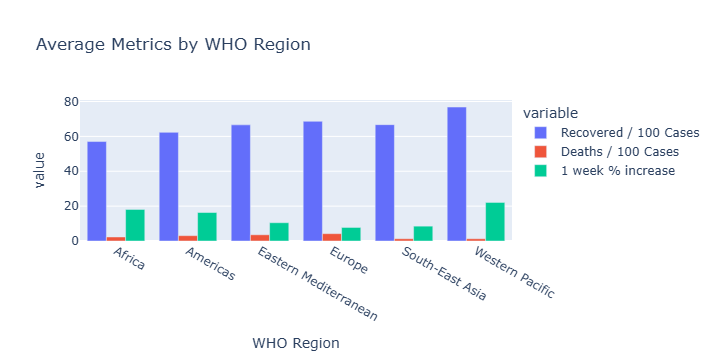

In [46]:
# متوسط كل المؤشرات لكل منطقة
region_stats = data.groupby('WHO Region')[numeric_cols].mean().reset_index()

fig = px.bar(region_stats, x='WHO Region', y=['Recovered / 100 Cases', 'Deaths / 100 Cases', '1 week % increase'],
             barmode='group', title='Average Metrics by WHO Region')
fig.show()